필요한 라이브러리 불러오기

필요한 라이브러리 <br> 
판다스 버전 : 1.3.4<br>
넘파이 버전 : 1.21.5<br>
kiwipiepy 버전 : 0.17.0<br>
sklearn 버전 : 1.0.2<br>
scipy 버전 : 1.7.3<br>
imblearn 버전 ; 0.12.0

In [10]:
# 라이브러리 버전이 맞지 않을 경우 아래 명령어의 주석을 제거한 후 실행해주세요.
# 이전 예제들을 실행했다면 앞에서 이미 버전을 맞췄습니다.
# !pip install pandas==1.3.4
# !pip install numpy==1.21.5
# !pip install kiwipiepy==0.17.0
# !pip install scikit-learn==1.0.2
# !pip install scipy==1.7.3

In [11]:
#imblearn을 설치합니다.
!pip install imblearn==0.0

In [12]:
# 버전 확인용
import pandas as pd
import numpy as np
import kiwipiepy
import sklearn
import scipy
import imblearn

print("판다스 버전 :", pd.__version__)
print("넘파이 버전:", np.__version__)
print("kiwipiepy 버전 :", kiwipiepy.__version__)
print("sklearn 버전:", sklearn.__version__)
print("scipy 버전 :", scipy.__version__)
print("imblearn 버전 :", imblearn.__version__)

판다스 버전 : 1.3.4
넘파이 버전: 1.24.3
kiwipiepy 버전 : 0.16.0
sklearn 버전: 1.3.2
scipy 버전 : 1.11.1
imblearn 버전 : 0.11.0


In [13]:
import numpy as np
import pandas as pd
import os

#시각화
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font',family='Malgun Gothic')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

C:\Users\it\AppData\Local\Temp\ipykernel_23952\1915823864.py:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [14]:
# 구글의 내 드라이브에서 ch03의 data 폴더를 찾은 후 오른쪽의 점 3개를 마우스 오른쪽 버튼으로 클릭하면 '경로 복사' 메뉴가 나옵니다.
# 경로를 복사해서 아래 코드의 경로 부분을 본인의 환경에 맞게 수정해주세요.

filepath = './data'
review_path = filepath + "/makeup_review/"

In [15]:
review_files = os.listdir(review_path)
len(review_files)

977

In [16]:
df_rvw_tmp = [pd.read_excel(review_path + file) for file in review_files if "_review.xlsx" in file]
df_rvw = pd.concat(df_rvw_tmp)
df_rvw.reset_index(drop=True, inplace=True)

df_rvw.head(3)

,score,review,date,url,price
0,평점5,커버력이 좋아요^^,21.09.27.,https://cr.shopping.naver.com/adcr.nhn?x=04Rxo...,"52,250"
1,평점5,"쿠션 하나 샀을 뿐인데 사은품이 한가득이네요. 스킨로션에 크림이랑 클렌징 오일, 클...",21.07.27.,https://cr.shopping.naver.com/adcr.nhn?x=04Rxo...,"52,250"
2,평점5,여윽시 헤라 불랙쿠션 진짜 이거 쓰면 다른거 절대 못써용,21.08.31.,https://cr.shopping.naver.com/adcr.nhn?x=04Rxo...,"52,250"


In [17]:
df_rvw = pd.read_excel(filepath+'/makeup_review.xlsx')

In [18]:
df_rvw = df_rvw[df_rvw['reviews']!='없음']

In [19]:
df_rvw.head(3)

,review_date,review_score,reviews,name,url,price
0,22.01.02.,평점4,빠른배송과 사은품 감사합니당,8_번제품,https://cr.shopping.naver.com/adcr.nhn?x=6%2Fb...,"28,500"
1,21.06.21.,평점5,블랙쿠션 그전꺼도 좋았는데 리뉴얼된것 역시나 넘넘 좋아용!,8_번제품,https://cr.shopping.naver.com/adcr.nhn?x=6%2Fb...,"28,500"
3,21.12.24.,평점5,촉촉하고 가벼워서 좋아요,3_번제품,https://cr.shopping.naver.com/adcr.nhn?x=wgbBY...,"59,500"


In [20]:
date = 'YY.MM.DD.'
print('월 정보 :', date[3:5])

월 정보 : MM


In [21]:
df_rvw['month'] = df_rvw['review_date'].apply(lambda x:x[3:5])

Text(0, 0.5, '리뷰수           ')

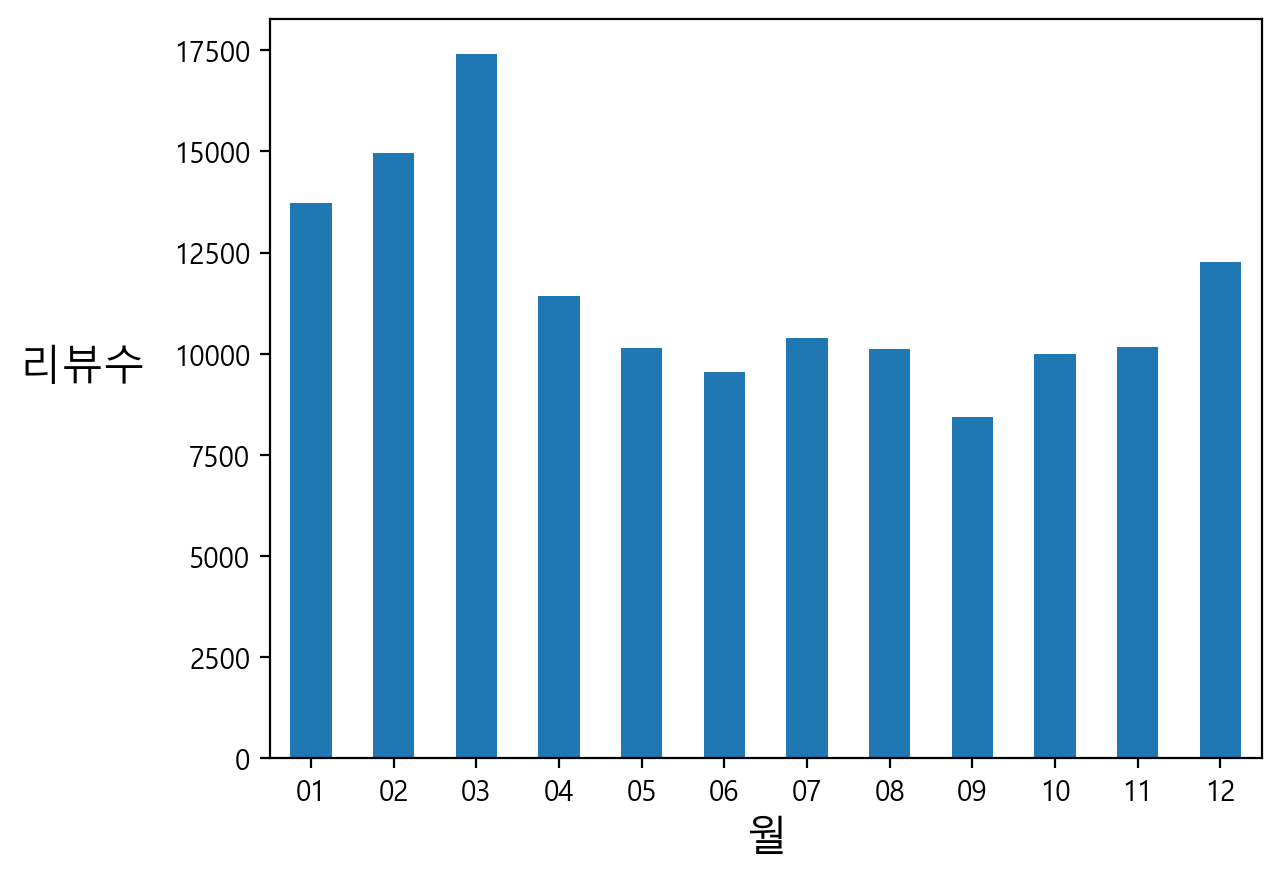

In [22]:
df_rvw['month'].value_counts().sort_index().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('월', size=15)
plt.ylabel('리뷰수           ', size=15, rotation=0)

형태소 분석을 이용해 리뷰에서 의도 찾기

In [23]:
from kiwipiepy import Kiwi

In [24]:
kiwi = Kiwi()

In [25]:
def find_nouns_verb_adject(text):
    """입력된 문장에서 명사, 동사 추출해 리스트로 반환"""

    tokens = kiwi.tokenize(text) #①

    target_idxs = []
    target_words = []
    for idx, wrd in enumerate(tokens):
        if 'NN' in wrd.tag: #②
            if len(wrd.form)>1:
                target_words.append(wrd.form)
                target_idxs.append('noun') #③
        elif wrd.tag.startswith('V'):
            tmp_form = wrd.form + "다" #④
            target_words.append(tmp_form)
            target_idxs.append('verb')

    return target_words, target_idxs

def find_intension_one_text(words, words_tag):
    """문장내 의도를 나타내는 단어를 추출한다"""
    intensions=[]
    for idx, tag in enumerate(words_tag):
        try:
            if tag=='verb': #⑤
                word = "".join(words[idx-1:idx+1])
                intensions.append(word)
            elif (tag=='noun') and (words_tag[idx+1]!='verb'): #⑥
                intensions.append(words[idx])
        except:
            intensions.append(words[idx])

    return intensions

def find_intension(text):
    """입력된 문장에서 의도를 찾아서 반환한다"""
    target_words, target_idxs = find_nouns_verb_adject(text)
    intensions = find_intension_one_text(target_words, target_idxs)
    return " ".join(intensions)

sample_sent = '이번에 출시한 신제품은 촉촉하고 가벼워서 좋아요'

find_intension(sample_sent) #⑦

'이번 출시 제품가볍다 가볍다좋다'

In [26]:
df_rvw['리뷰_의도'] = df_rvw['reviews'].apply(lambda x:find_intension(x))

In [27]:
df_rvw.to_csv(review_path + 'makeup_review_fin.csv', index=False)

In [28]:
df_rvw = pd.read_csv(review_path + 'makeup_review_fin.csv')

In [29]:
df_rvw_1 = df_rvw.copy()

In [30]:
df_rvw_1.head(2)

,review_date,review_score,reviews,name,url,price,month,리뷰_의도
0,22.01.02.,평점4,빠른배송과 사은품 감사합니당,8_번제품,https://cr.shopping.naver.com/adcr.nhn?x=6%2Fb...,"28,500",1,배송 사은품 감사
1,21.06.21.,평점5,블랙쿠션 그전꺼도 좋았는데 리뉴얼된것 역시나 넘넘 좋아용!,8_번제품,https://cr.shopping.naver.com/adcr.nhn?x=6%2Fb...,"28,500",6,블랙 쿠션좋다 리뉴얼좋다


In [31]:
df_rvw_1['리뷰_의도'] = df_rvw_1['리뷰_의도'].astype('str')

nGram으로 키워드 파악하기

In [32]:
def getGram(tokens, n):
    """분절된 단어를 전달하면 nGram을 반환"""
    bigrams =[]
    for i in range(0, int(len(tokens))):
        tmp = tokens[i:i+n]
        if len(tmp)>1:
            bigrams.append(tmp)

    ngram_result = pd.DataFrame(data={'nGram':bigrams})
    ngram_result['nGram'] = ngram_result['nGram'].apply(lambda x:" ".join(x))
    ngram_result = ngram_result['nGram'].value_counts().to_frame()
    ngram_result.reset_index(inplace=True)

    return ngram_result

In [33]:
tokens = " ".join(df_rvw_1['리뷰_의도'].tolist()).split()

In [34]:
bigram_rvw = getGram(tokens=tokens, n=2)

In [35]:
display(bigram_rvw[:20])
display(bigram_rvw[20:40])
display(bigram_rvw[40:60])

,index,nGram
0,배송빠르다 빠르다좋다,1924
1,좋다좋다 좋다좋다,1575
2,쓰다보다 보다좋다,1560
3,마스크묻다 묻다나다,1098
4,피부좋다 좋다보이다,1000
5,쓰다보다 보다않다,928
6,구매 의사있다,856
7,배송 감사,806
8,사용 제품이다,804
9,피부 표현,725


,index,nGram
20,만족쓰다 쓰다있다,466
21,좋다쓰다 쓰다있다,465
22,샘플챙기다 챙기다주다,460
23,여름쓰다 쓰다좋다,459
24,묻다나다 나다않다,459
25,만족 만족,449
26,피부 표현예쁘다,444
27,쓰다보다 보다싶다,444
28,쓰다보다 보다이다,438
29,이다쓰다 쓰다보다,437


,index,nGram
40,지성 피부이다,389
41,건성 피부이다,387
42,수정 화장,382
43,수정 화장하다,364
44,구매 만족,357
45,만족 구매,343
46,쓰다보다 보다괜찮다,343
47,커버 지속좋다,340
48,쿠션 사용,339
49,블랙 쿠션쓰다,339


표현의 숨겨진 의미 찾기

In [36]:
def print_center_words(center_word, dataframe, column_name, n):
    """특정 단어를 중앙에 위치하고 앞 뒤 단어 n개 출력"""
    dataframe[column_name] = dataframe[column_name].astype('str')

    #어절 길이가 1이면 삭제
    review_stpwrds = []
    for review in dataframe[column_name]:
        review_tokens = [token for token in review.split() if len(token) > 1]
        review_join = " ".join(review_tokens)
        review_stpwrds.append(review_join)

    rvws = [rvw for rvw in review_stpwrds if center_word in rvw]

    #앞 뒤 n개 단어를 가져온다
    for rvw in rvws:
        rvw_split = rvw.split()
        for idx, token in enumerate(rvw_split):
            if center_word in token:
                front_part = " ".join(rvw_split[idx-n:idx])
                end_part = " ".join(rvw_split[idx+1:idx+n+1])
                joined_parts = front_part + " " + center_word + " " + end_part
                len_joined_parts = joined_parts.split()
                if len(len_joined_parts)==(n*2+1):
                    print("{} '\x1b[1;31m{}\x1b[0m' {}".format(front_part, center_word, end_part))

In [37]:
print_center_words(center_word='좋다', dataframe=df_rvw_1, column_name='리뷰_의도', n=4)

오다예쁘다 마음들다 블랙 쿠션 '좋다' 좋다지다 지다하다 구매보다 건성
마음들다 블랙 쿠션 리뉴좋다 '좋다' 지다하다 구매보다 건성 피부이다
매트보다 걱정촉촉하다 촉촉하다발리다 보송 '좋다' 여름쓰다 쓰다좋다 쿠션같다 마스크묻다
촉촉하다발리다 보송 마무리좋다 여름쓰다 '좋다' 쿠션같다 마스크묻다 지속좋다 커버좋다
여름쓰다 쓰다좋다 쿠션같다 마스크묻다 '좋다' 커버좋다 컨실러하다 하다연하다 잡티가리다
쓰다좋다 쿠션같다 마스크묻다 지속좋다 '좋다' 컨실러하다 하다연하다 잡티가리다 가리다지다
자세임하다 직원 모습 칭찬주다 '좋다' 샘플 종류오다 이것저것 테스트보다
커버 피부 건조지다 지다않다 '좋다' 커버 자연 지속좋다 감탄하다
지다않다 않다좋다 커버 자연 '좋다' 감탄하다 제품이다 추천이다 이번
구비두다 두다되다 차례 라이브통하다 '좋다' 사은품 혜택 구매 촉진같다
밀착묻어나다 커버되요 하루 종일 '좋다' 쿠션이다 케이스이쁘다 이쁘다떨어지다 떨어지다사다
붉다있다 있다보이다 얼굴하얗다 하얗다하다 '좋다' 좋다하다 피부 차이나다 호수좋아하다
있다보이다 얼굴하얗다 하얗다하다 하다좋다 '좋다' 피부 차이나다 호수좋아하다 좋아하다사다
컨실러쌓다 쌓다않다 않다얇다 얇다고르다 '좋다' 지속좋다 좋다예쁘다 예쁘다무너지다 감동
쌓다않다 않다얇다 얇다고르다 밀착좋다 '좋다' 좋다예쁘다 예쁘다무너지다 감동 부분이다
않다얇다 얇다고르다 밀착좋다 지속좋다 '좋다' 예쁘다무너지다 감동 부분이다 인생
좋다하얗다 하얗다지다 지다보다 보다사다 '좋다' 커버약하다 질감 만족 리필이다
방송잡히다 잡히다보다 보다사다 사다이다 '좋다' 배송빠르다 샘플보내다 보내다주다 주다보내다
불빛 단계 설정푸다 푸다예쁘다 '좋다' 마스크 때문 동안 화장하다
모공끼다 마스크더러워지다 검색 네오 '좋다' 얘기듣다 듣다사다 사다보다 보다이다
마음들다 들다바르다 시간지나다 지나다않다 '좋다' 여름 사용있다 있다같다 색상사다
출시 구매 쿠션이다 이번 '좋다' 고민하다 하다지르다 구매 이유
흉터 붉은기 잡티가려지다 마스크벗겨

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [38]:
from collections import Counter

rvw_tokens = " ".join(df_rvw_1['리뷰_의도'].tolist()).split()
common_words = Counter(rvw_tokens).most_common()
common_words_dict = {common_words[i][0]:common_words[i][1] for i in range(len(common_words))}

common_words_dict

{'구매': 13379,
 '만족': 12759,
 '쓰다보다': 12535,
 '쿠션': 12080,
 '피부': 9643,
 '커버': 8955,
 '배송빠르다': 8043,
 '사용': 7211,
 '쓰다있다': 7051,
 '커버좋다': 7021,
 '제품이다': 5900,
 '커버되다': 5056,
 '좋다같다': 5050,
 '제품': 4782,
 '감사': 4555,
 '밀착좋다': 4217,
 '자연': 3840,
 '쓰다이다': 3747,
 '마스크묻다': 3619,
 '좋다좋다': 3603,
 '쿠션이다': 3563,
 '이다좋다': 3423,
 '쓰다좋다': 3332,
 '사용이다': 3319,
 '피부이다': 2995,
 '좋다쓰다': 2985,
 '밀착': 2981,
 '사용보다': 2961,
 '쿠션쓰다': 2898,
 '리필': 2738,
 '주문': 2736,
 '좋다하다': 2700,
 '마음들다': 2695,
 '매트': 2610,
 '마스크묻어나다': 2607,
 '않다좋다': 2605,
 '퍼프': 2605,
 '배송': 2573,
 '생각': 2571,
 '보다좋다': 2548,
 '지속좋다': 2542,
 '가격': 2496,
 '사용있다': 2441,
 '느낌이다': 2385,
 '건조': 2378,
 '있다좋다': 2270,
 '케이스': 2250,
 '이다쓰다': 2152,
 '추천': 2139,
 '사다보다': 2095,
 '수정': 2059,
 '건성이다': 2045,
 '지속': 2030,
 '피부좋다': 2024,
 '빠르다좋다': 1968,
 '마스크쓰다': 1952,
 '구입': 1940,
 '마스크': 1908,
 '색상': 1903,
 '블랙': 1886,
 '구매이다': 1882,
 '시간지나다': 1836,
 '화장': 1824,
 '이다하다': 1760,
 '되다좋다': 1706,
 '피부맞다': 1697,
 '팩트': 1683,
 '얼굴': 1635,
 '묻다나다': 1627,
 '되다같다': 

In [39]:
def print_center_words_2(center_word, dataframe, column_name, n):
    """특정 단어를 중앙에 위치하고 앞 뒤 단어 n개 출력"""
    dataframe[column_name] = dataframe[column_name].astype('str')

    #어절 길이가 1이면 삭제
    review_stpwrds = []
    for review in dataframe[column_name]:
        review_tokens = [token for token in review.split() if len(token) > 1]
        review_join = " ".join(review_tokens)
        review_stpwrds.append(review_join)

    rvws = [rvw for rvw in review_stpwrds if center_word in rvw]

    #앞뒤 n개 단어를 가져온다
    review_results = []
    for rvw in rvws:
        rvw_split = rvw.split()
        for idx, token in enumerate(rvw_split):
            if center_word in token:
                front_part = " ".join(rvw_split[idx-n:idx])
                end_part = " ".join(rvw_split[idx+1:idx+n+1])
                joined_parts = front_part + " " + center_word + " " + end_part
                len_joined_parts = joined_parts.split()
                if len(len_joined_parts)==(n*2+1):
                    review_results.append(joined_parts)

    #어절 빈도를 계산한다.
    all_words_counts = []
    for result in review_results:
        count = 0
        for t in result.split():
            cnt = common_words_dict[t]
            count += cnt
        all_words_counts.append(count)

    df_count = pd.DataFrame(data={"특정단어_포함한_리뷰":review_results,
                                  "빈도":all_words_counts}).sort_values(by='빈도', ascending=False)

    return df_count

In [40]:
df_count = print_center_words_2(center_word='좋다', dataframe=df_rvw_1, column_name='리뷰_의도', n=4)

In [41]:
df_count[:10]

,특정단어_포함한_리뷰,빈도
1694,만족 라이브 방송통하다 구매 좋다 가격저렴하다 만족 사용 구매,61762
10649,이다같다 평소 쿠션 피부 좋다 좋다하다 제품 쿠션 만족,57857
10650,평소 쿠션 피부 표현좋다 좋다 제품 쿠션 만족 쿠션이다,57640
13391,컨실러쓰다 정도 만족 커버되다 좋다 피부 표현되다 구매 만족,57158
13410,피부 피부이다 이다쓰다 쓰다보다 좋다 구매 사은품챙기다 챙기다주다 만족,56495
762,감사쓰다 쿠션 피부 자연올라가다 좋다 좋다같다 구매 구매 건강,55461
3041,쿠션 관심많다 사람이다 이다좋다 좋다 쓰다보다 만족 제품없다 쿠션,54798
20605,쓰다보다 지속좋다 구매 배송빠르다 좋다 퍼프 추가 구매 구매싶다,54697
4949,쿠션 사용 뮤드 쿠션 좋다 밀착되다 아침 쿠션 사용,53802
9302,좋다같다 사용 프라이머 사용 좋다 좋다같다 만족 구매 의사있다,53137


머신 러닝을 활용해 중요한 내용 찾기<br>
데이터 전처리

In [42]:
df_rvw_1.head(2)

,review_date,review_score,reviews,name,url,price,month,리뷰_의도
0,22.01.02.,평점4,빠른배송과 사은품 감사합니당,8_번제품,https://cr.shopping.naver.com/adcr.nhn?x=6%2Fb...,"28,500",1,배송 사은품 감사
1,21.06.21.,평점5,블랙쿠션 그전꺼도 좋았는데 리뉴얼된것 역시나 넘넘 좋아용!,8_번제품,https://cr.shopping.naver.com/adcr.nhn?x=6%2Fb...,"28,500",6,블랙 쿠션좋다 리뉴얼좋다


In [43]:
import re

def get_digit_only(text):
    """숫자만 추출한다"""
    if text !='없음':
        tmp = re.compile('[0-9]+').findall(str(text)) #②
        result = ''.join(tmp) #③

        return int(result) #④
    else:
        return 0


def labeling_review(score):
    """3 이상이면 1 반환"""
    if score>3:
        return 1
    else:
        return 0

In [44]:
df_rvw_1['review_score'] = df_rvw_1['review_score'].apply(lambda x:get_digit_only(x))
df_rvw_1['label'] = df_rvw_1['review_score'].apply(lambda x:labeling_review(x))

In [45]:
df_rvw_1.sample(1)

,review_date,review_score,reviews,name,url,price,month,리뷰_의도,label
52476,19.11.28.,4,"저는 건성이고, 날이 건조해지면서 피부도 더 건조한 느낌이라 촉촉한 걸 기대하고 샀...",443_번제품,https://cr.shopping.naver.com/adcr.nhn?x=2NqWh...,"17,900",11,건성이다 건조지다 피부 건조 느낌이다 기대사다 사다그렇다 그렇다않다 세미매트 느낌바...,1


In [46]:
#사용감
use_function = ['커버','밀착','얇','사용','부드','부들','매끈', '광채','간편', '매트', '볼륨','화사',]

#성분
ingre_function = ['위해','주의','성분','순한','자극','농축','천연','유기','민감','예민','여드름','잡티','트러블']

#가격
price_function = ['가성','가격','할인','세일']

#마스크
mask_function = ['마스크','코로나']

#시원함
cool_function = ['여름','시원','상큼','투명','계절','휴가','올봄','봄엔','가을','환절','습기']

#수분
water_function = ['촉촉','수분','보습','건조','푸석','유분','각질']

cushion_funcs = [use_function, ingre_function, price_function, mask_function, cool_function, water_function]

In [47]:
def count_func(review, function):
    """리뷰와 기능을 넣으면 기능이 언급된 수를 센다"""
    text_tokens = str(review).split()
    cnt = 0

    for token in text_tokens:
        for f in function:
            if f in token:
                cnt += 1

    return cnt

In [48]:
text = "커버력 좋다 밀착력 가격 가성비 좋다 수분감 있다"

use_cnt = count_func(text, use_function)
print('리뷰에서 사용감 등장 빈도 :', use_cnt)

리뷰에서 사용감 등장 빈도 : 2


In [49]:
from tqdm import tqdm_notebook

column_names = ['사용감 속성','성분 속성','가격 속성','마스크 속성','시원함 속성', '수분 속성']
count_df = pd.DataFrame(columns=column_names)

for review in tqdm_notebook(df_rvw_1['리뷰_의도']):
    funcs_cnt = []
    for f in cushion_funcs:
        cnt = count_func(review, f)
        funcs_cnt.append(cnt)
    series = pd.Series(funcs_cnt, index=count_df.columns)
    count_df = count_df.append(series, ignore_index=True)

C:\Users\it\AppData\Local\Temp\ipykernel_23952\2657834767.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for review in tqdm_notebook(df_rvw_1['리뷰_의도']):


  0%|          | 0/138583 [00:00<?, ?it/s]

In [50]:
count_df.head(2)

,사용감 속성,성분 속성,가격 속성,마스크 속성,시원함 속성,수분 속성
0,0,0,0,0,0,0
1,0,0,0,0,0,0


In [51]:
count_df['sum'] = count_df.sum(axis=1)

count_df['name']=df_rvw_1['name']
count_df['label']=df_rvw_1['label']

count_df=count_df[count_df['sum']!=0]

In [52]:
count_df.sample(3)

,사용감 속성,성분 속성,가격 속성,마스크 속성,시원함 속성,수분 속성,sum,name,label
25853,0,0,0,0,2,0,2.0,202_번제품,1
61696,0,0,0,1,0,0,1.0,570_번제품,1
117385,2,0,0,1,0,0,3.0,816_번제품,1


In [53]:
count_df.to_csv(review_path + '머신러닝용데이터셋.csv', index=False)

데이터 표준화

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
count_df = pd.read_csv(review_path + '머신러닝용데이터셋.csv')

In [56]:
count_df.head(2)

,사용감 속성,성분 속성,가격 속성,마스크 속성,시원함 속성,수분 속성,sum,name,label
0,0,0,0,0,0,1,1.0,3_번제품,1
1,1,0,0,0,0,0,1.0,0_번제품,1


In [57]:
scaler = StandardScaler()
scaler.fit(count_df.iloc[:,:-3])
count_data_scaled = scaler.transform(count_df.iloc[:,:-3])
df_count_scaled = pd.DataFrame(count_data_scaled, columns=count_df.iloc[:,:-3].columns)

In [58]:
print("****각 칼럼 평균값****")
print(df_count_scaled.mean())
print("\n****각 칼럼 분산값****")
print(df_count_scaled.std())

****각 칼럼 평균값****
사용감 속성   -1.473982e-15
성분 속성     1.072989e-14
가격 속성    -6.391158e-15
마스크 속성    1.241897e-14
시원함 속성    7.224790e-15
수분 속성     1.684678e-14
dtype: float64

****각 칼럼 분산값****
사용감 속성    1.000007
성분 속성     1.000007
가격 속성     1.000007
마스크 속성    1.000007
시원함 속성    1.000007
수분 속성     1.000007
dtype: float64


데이터 분포가 정규 분포인지 확인하기

In [59]:
from scipy.stats import skew

In [60]:
skew_features = df_count_scaled[df_count_scaled.columns].apply((lambda x:skew(x)))

In [61]:
skew_features

사용감 속성    5.439823
성분 속성     8.011518
가격 속성     3.235157
마스크 속성    4.454143
시원함 속성    4.719253
수분 속성     4.831354
dtype: float64

In [62]:
df_count_scaled[skew_features.index] = np.log1p(df_count_scaled[skew_features.index])

In [63]:
print('성분 칼럼에 저장된 데이터 비대칭 정도 :', skew(df_count_scaled['성분 속성']))
print('사용감 칼럼에 저장된 데이터 비대칭 정도 :',skew(df_count_scaled['사용감 속성']))

성분 칼럼에 저장된 데이터 비대칭 정도 : 3.2148218995737268
사용감 칼럼에 저장된 데이터 비대칭 정도 : -0.5008175228721627


In [64]:
from sklearn.model_selection import train_test_split

In [65]:
df_count_scaled_input = df_count_scaled[['사용감 속성','성분 속성','가격 속성','마스크 속성','시원함 속성','수분 속성']]
X_train, X_test, y_train, y_test = train_test_split(df_count_scaled_input, count_df['label'],
                                                    test_size=0.2, random_state=0)

오버샘플링

In [66]:
from imblearn.over_sampling import SMOTE

In [67]:
smote = SMOTE(random_state=0)

In [68]:
y_train

54301    1
36920    1
65156    1
31179    1
24741    1
        ..
21243    1
45891    1
42613    0
43567    1
68268    1
Name: label, Length: 54714, dtype: int64

In [69]:
X_train.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)
y_test.fillna(0, inplace=True)

In [70]:
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [71]:
y_train_over.value_counts()

1    49751
0    49751
Name: label, dtype: int64

로지스틱 회귀

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [73]:
lr_clf = LogisticRegression()

In [74]:
parameter_lr = {"penalty":['l2','l1'], "C":[0.001, 0.005, 0.01, 0.1, 1]}
               
                

grid_lr = GridSearchCV(lr_clf, param_grid=parameter_lr, scoring='accuracy', cv=5)

In [75]:
grid_lr.fit(X_train_over, y_train_over)

C:\Users\it\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\it\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\it\anaconda3\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\it\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solver = _check_solver

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.005, 0.01, 0.1, 1],
                         'penalty': ['l2', 'l1']},
             scoring='accuracy')

In [76]:
print("최적 하이퍼 파라미터 :", grid_lr.best_params_)
print("최적 평균 정확도 :", grid_lr.best_score_)

최적 하이퍼 파라미터 : {'C': 0.1, 'penalty': 'l2'}
최적 평균 정확도 : 0.5368334678770467


In [77]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

estimator_lr = grid_lr.best_estimator_
pred = estimator_lr.predict(X_test)

model_accu_score= accuracy_score(y_test, pred)
model_preci_score= precision_score(y_test, pred)
model_recall_score= recall_score(y_test, pred)
model_f1_score= f1_score(y_test, pred)

print("모델 정확도 :", np.round(model_accu_score*100, 3), "%")
print("모델 정밀도 :", np.round(model_preci_score*100, 3), "%")
print("모델 재현율 :", np.round(model_recall_score*100, 3), "%")
print("모델 F1 :", np.round(model_f1_score*100, 3), "%")

모델 정확도 : 39.104 %
모델 정밀도 : 92.124 %
모델 재현율 : 35.986 %
모델 F1 : 51.755 %


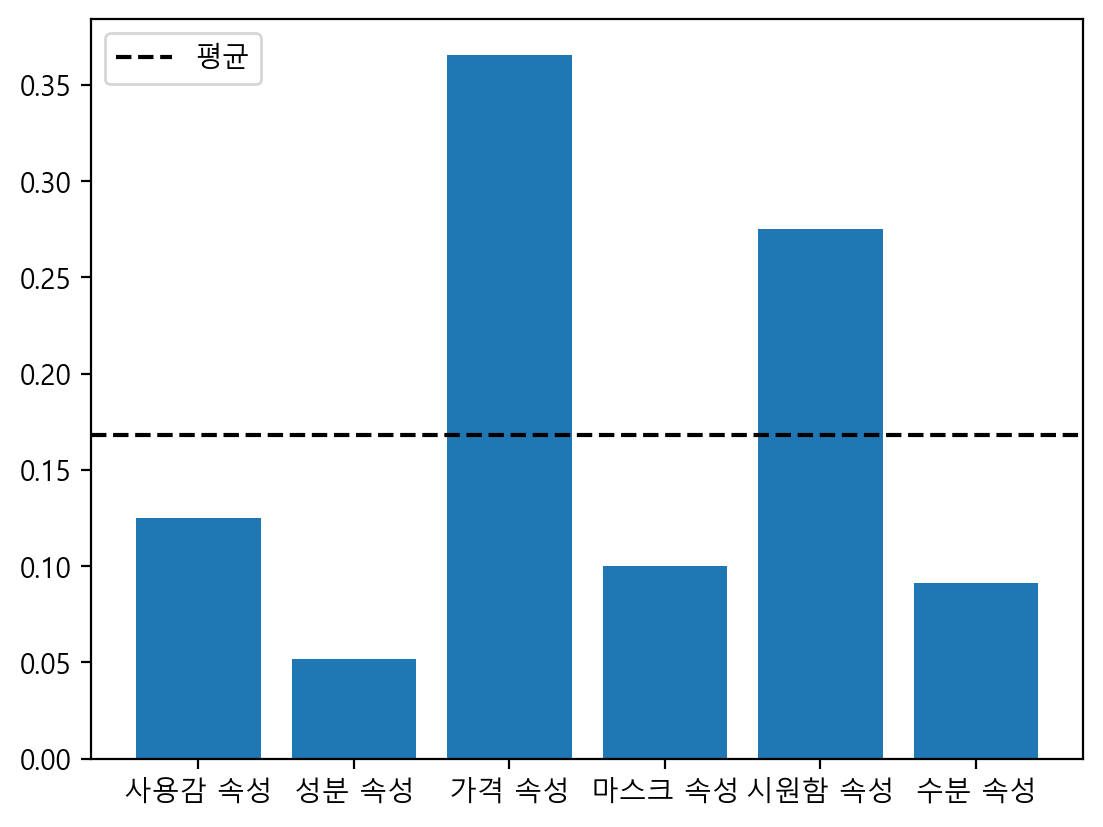

In [78]:
plt.bar(X_train.columns, np.abs(estimator_lr.coef_[0]))
plt.axhline(np.abs(estimator_lr.coef_[0]).mean(), color='k', linestyle='dashed', label='평균')
plt.legend(loc='upper left')

의사결정트리 모델

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
dt_clf = DecisionTreeClassifier(random_state=0)
parameter_dt = {"max_depth":[21,22,23],
                "min_samples_split":[2,3],
                "min_samples_leaf":[2,3],
                "max_features":[4,5,6]}

grid_dt = GridSearchCV(dt_clf, param_grid=parameter_dt, scoring='accuracy', cv=5)
grid_dt.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [21, 22, 23], 'max_features': [4, 5, 6],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3]},
             scoring='accuracy')

In [81]:
print("최적 하이퍼 파라미터 :", grid_dt.best_params_)
print("최적 평균 정확도 :", grid_dt.best_score_)

최적 하이퍼 파라미터 : {'max_depth': 23, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}
최적 평균 정확도 : 0.5682801182435973


In [82]:
estimator_dt = grid_dt.best_estimator_
pred_dt = estimator_dt.predict(X_test)

model_acc_score_dt= accuracy_score(y_test, pred_dt)
model_preci_score_dt= precision_score(y_test, pred_dt)
model_recall_score_dt= recall_score(y_test, pred_dt)
model_f1_score_dt= f1_score(y_test, pred_dt)

print("DT 모델 정확도 :", np.round(model_acc_score_dt*100, 3), "%")
print("DT 모델 정밀도 :", np.round(model_preci_score_dt*100, 3), "%")
print("DT 모델 재현율 :", np.round(model_recall_score_dt*100, 3), "%")
print("DT 모델 F1 :", np.round(model_f1_score_dt*100, 3), "%")

DT 모델 정확도 : 42.796 %
DT 모델 정밀도 : 92.407 %
DT 모델 재현율 : 40.287 %
DT 모델 F1 : 56.111 %


<BarContainer object of 6 artists>

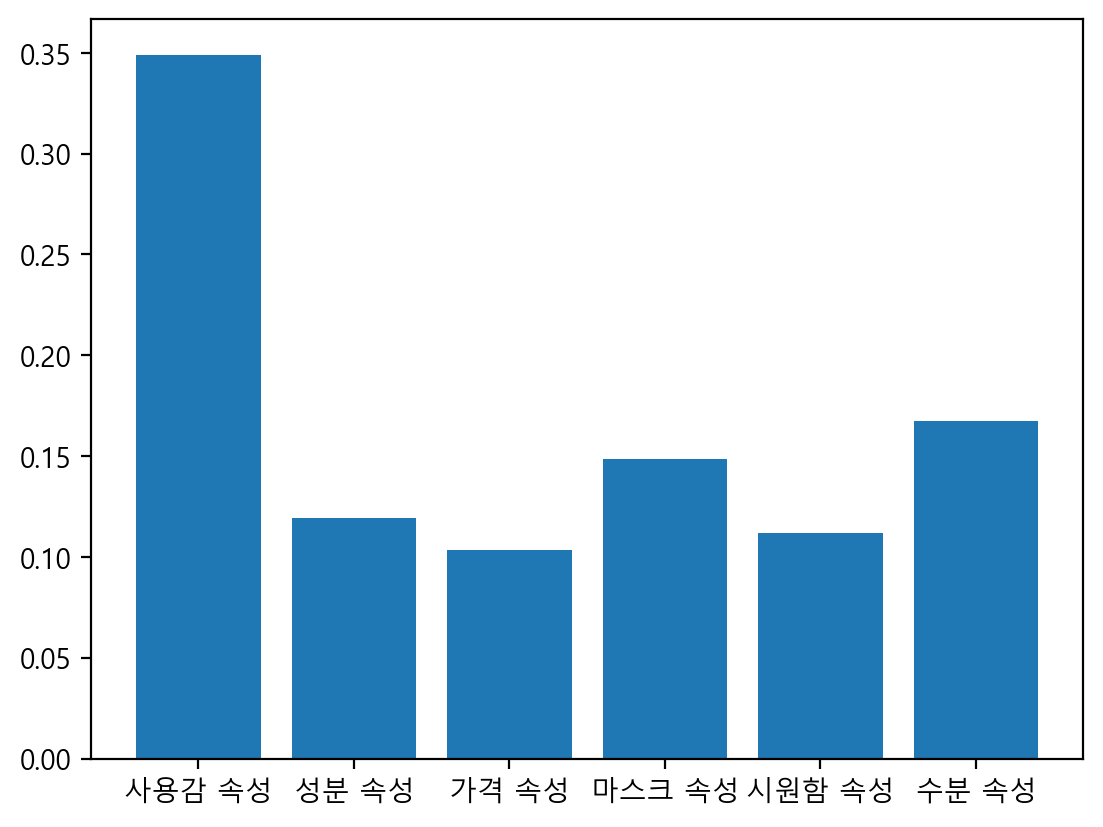

In [83]:
plt.bar(X_train.columns, estimator_dt.feature_importances_)

랜덤포레스트

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rf_clf = RandomForestClassifier(min_samples_split=2, min_samples_leaf=2)

parameter_rf = {"max_depth":[28,30,32],
                "n_estimators":[400,800,1200]
                }

grid_rf = GridSearchCV(rf_clf, param_grid=parameter_rf, scoring='accuracy', cv=5)

In [86]:
grid_rf.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=RandomForestClassifier(min_samples_leaf=2),
             param_grid={'max_depth': [28, 30, 32],
                         'n_estimators': [400, 800, 1200]},
             scoring='accuracy')

In [87]:
print("최적 하이퍼 파라미터 :", grid_rf.best_params_)
print("최적 평균 정확도 :", grid_rf.best_score_)

최적 하이퍼 파라미터 : {'max_depth': 32, 'n_estimators': 400}
최적 평균 정확도 : 0.5693253312439289


In [88]:
estimator_rf = grid_rf.best_estimator_
pred_rf = estimator_rf.predict(X_test)

model_acc_score_rf= accuracy_score(y_test, pred_rf)
model_preci_score_rf= precision_score(y_test, pred_rf)
model_recall_score_rf= recall_score(y_test, pred_rf)
model_f1_score_rf= f1_score(y_test, pred_rf)

print("RF 모델 정확도 :", np.round(model_acc_score_rf*100, 3), "%")
print("RF 모델 정밀도 :", np.round(model_preci_score_rf*100, 3), "%")
print("RF 모델 재현율 :", np.round(model_recall_score_rf*100, 3), "%")
print("RF 모델 F1 :", np.round(model_f1_score_rf*100, 3), "%")

RF 모델 정확도 : 42.905 %
RF 모델 정밀도 : 92.397 %
RF 모델 재현율 : 40.424 %
RF 모델 F1 : 56.242 %


<BarContainer object of 6 artists>

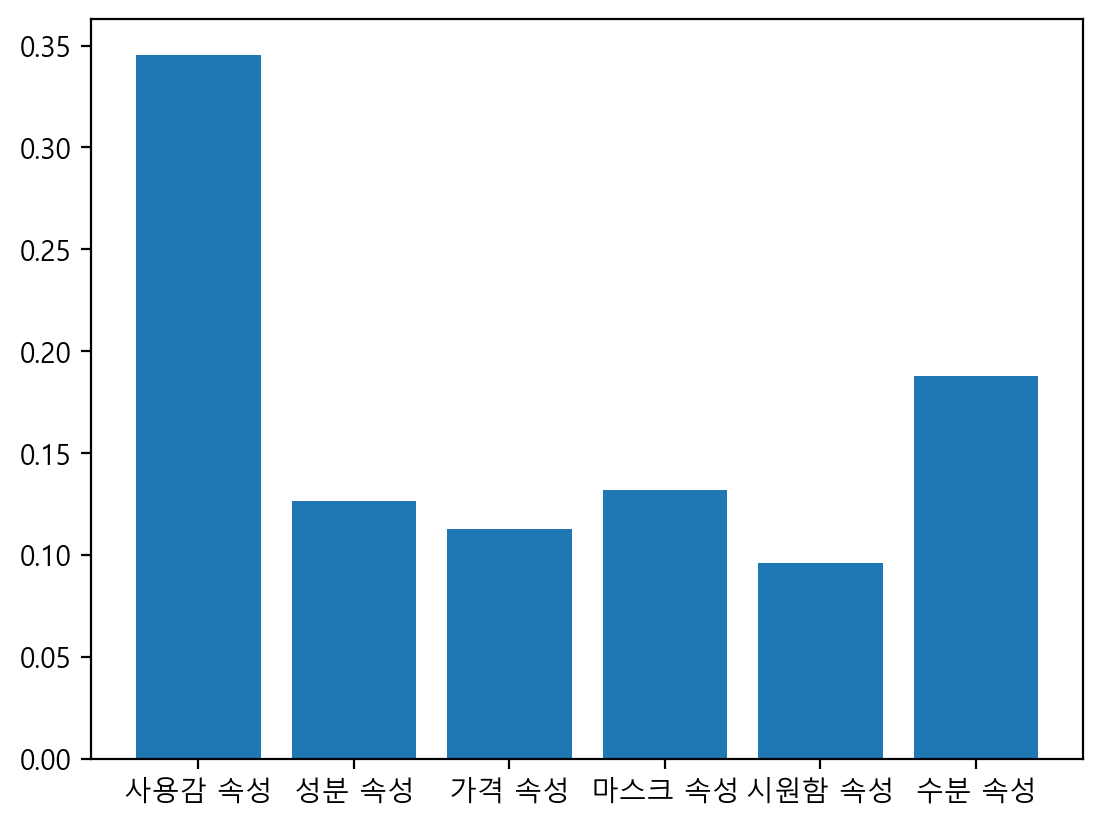

In [89]:
plt.bar(X_train.columns, estimator_rf.feature_importances_)